# Introduction to Data Science
## Homework 3

Student Name: Wenjie Sun

Student Netid: ws854
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

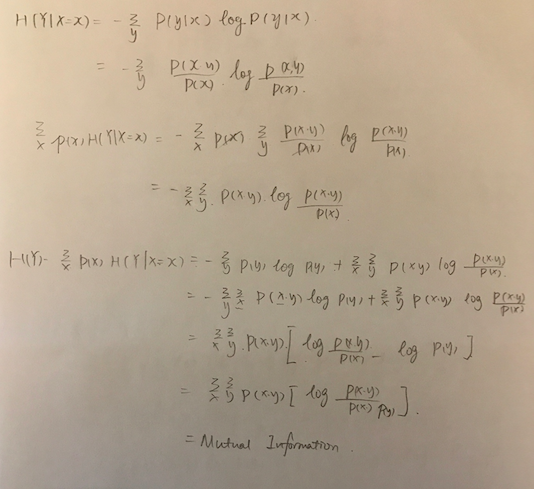

In [109]:
from IPython.display import Image

fig = Image(filename=('/Users/sunevan/Dropbox/Fall 2016/Introduction to Data Science/Homework/Hw3/q1.png'))
fig

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import pandas as pd
import numpy as np
import random 

#data = pd.read_csv("C:/Users/Wenjie Sun/Desktop/ids 3/cell2cell_data.csv", header = None)
data = pd.read_csv ("cell2cell_data.csv")
data.columns = ["revenue","outcalls","incalls","months","eqpdays","webcap","marryyes","travel","pcown","creditcd","retcalls","churndep"]

train_index = random.sample(range(0,len(data)),int(len(data)*0.8))
test_index = list(set(range(0,len(data)))-set(train_index))

train_df = data.ix[train_index]
test_df = data.ix[test_index]



2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

#### Answer: If we are asked to prove the random selection, I can plot the distribution of the original dataset and the distribution of the train dataset. And, if the distribution is the same or similar to each other, it means the train data is randomly sampled from the dataset. 

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [2]:
from sklearn.tree import DecisionTreeClassifier


train_features = train_df.drop('churndep',1).values
train_target = train_df['churndep'].values

test_features = test_df.drop('churndep',1).values
test_target = test_df['churndep'].values

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_features,train_target)



In [3]:
print (test_features)

[[ 83.53  20.     1.   ...,   0.     0.     4.  ]
 [ 41.77  43.33   3.   ...,   0.     1.     0.  ]
 [  7.82   0.     0.   ...,   0.     0.     2.  ]
 ..., 
 [ 61.93  35.67   7.67 ...,   0.     1.     0.  ]
 [ 63.23  42.     1.33 ...,   0.     1.     0.  ]
 [ 65.29  36.    45.33 ...,   0.     0.     0.  ]]


4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

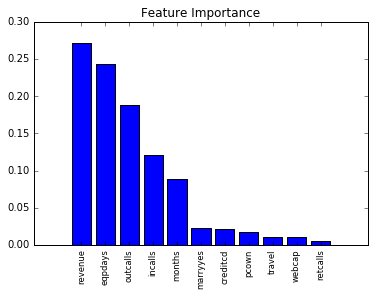

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

importance = clf.feature_importances_
indices = np.argsort(importance)[::-1] 

f,ax = plt.subplots()
ax.bar(np.arange(11),importance[indices],0.8,color='b',align='center')
ax.set_xticks(np.arange(len(importance)))
labels = data.columns[indices]
ax.set_xticklabels(labels,size='small',rotation='vertical')
plt.title('Feature Importance')
plt.show()


5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [113]:
top_3_columns = data.columns[indices][0:3]
top_3_data = data.ix[:,top_3_columns]

print (top_3_data.corr())

           revenue   eqpdays  outcalls
revenue   1.000000 -0.221956  0.500869
eqpdays  -0.221956  1.000000 -0.243991
outcalls  0.500869 -0.243991  1.000000


#### Analysis: It makes sense that more outcalls a customer has, the more revenue it generates, which brings a postive correlation between revenue and outcalls. It seems that longer time a customer has the equipment, the less call and less revenus generates. It is probably becasue customers start using other devices or less interested in making phone calls. 

6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [114]:
# Code here
from sklearn.metrics import accuracy_score

train_predict = clf.predict(train_features)
test_predict = clf.predict(test_features)

train_accuracy = accuracy_score(train_target,train_predict)
test_accuracy = accuracy_score(test_target,test_predict)

print ("train_accuracy: ",train_accuracy)
print ("test_accuracy: ",test_accuracy)


train_accuracy:  0.999843191369
test_accuracy:  0.528474661315


### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [115]:
# Code here
num_pct = np.array(list(range(5,55,5)))

min_samples_split = num_pct/5000*len(train_df)
min_samples_split_values = min_samples_split.astype(np.int)

min_samples_leaf = num_pct/10000*len(train_df)
min_samples_leaf_values = min_samples_leaf.astype(np.int)

print (len(train_df))
print (min_samples_split_values)
print (min_samples_leaf_values)


31886
[ 31  63  95 127 159 191 223 255 286 318]
[ 15  31  47  63  79  95 111 127 143 159]


2\. Explain in words your reasoning for choosing the above ranges.

#### Answer: There are 11 features, which means in the ideal world that the data will be split 2**11 times (assume the data can be split just half and half in each leaf). This translates to around 100 in the lowest level. So, my min. split value and min. leaf value are averaged around 100. Also, I choose to make the min_sample_split is doubled of the min_sample_leaf_value, which simply assumes that each split is just half and half and want to make sure that to form a split should be twice bigger than the leaf value.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

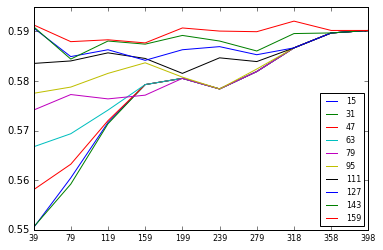

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline



accuracy_series = [[] for leaf_index in range(10)]
#accuracy_series_split = [[] for leaf_index in range(10)]
max_test_acc = 0 
max_leaf_value = 0
max_split_value = 0
for split_index in range(10):
    for leaf_index in range(10):
        split_values = min_samples_split_values[split_index]
        leaf_values = min_samples_leaf_values[leaf_index]
       
        clf_new = DecisionTreeClassifier(criterion='entropy',min_samples_split=split_values, min_samples_leaf=leaf_values)
        
        clf_new = clf_new.fit(train_features,train_target)
        test_predict = clf_new.predict(test_features)
        test_accuracy = accuracy_score(test_target,test_predict)
        accuracy_series[leaf_index].append(test_accuracy)
        
        if test_accuracy > max_test_acc:
            max_test_acc = test_accuracy 
            max_leaf_value = leaf_values
            max_split_value = split_values

        
x = [x for x in range(10)]
y = accuracy_series

plt.plot(x,y,label = min_samples_split_values)

plt.xticks(x,lables,size = 8)
plt.legend(min_samples_leaf_values,loc ='lower right',prop={'size':8})

plt.show()



4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [118]:
# Code here
print ("max_test_accuracy: ",max_test_acc)
print ("max_leaf_value: ",max_leaf_value)
print ("max_split_value: ", max_split_value)


max_test_accuracy:  0.592072252885
max_leaf_value:  127
max_split_value:  318


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

#### Answer: Marketing department can use this model to identify users that are highly likely to churn and target them with offers like discount or add-on service. The prediction is good for the business becasue acquiring a new customer is always costly. However, a retention offer probably will cost much less or almost close to 0 (if it is an add-on service, like more data) to the company. Of course, different company has different applications. Some of them may be able to provide a dedicated customer care line or simply send them an eDM.  The model can be improved by a few ways: 1) most of the data collected in this model is demographic. It seems to make more sense to collect more user-interaction data, such as if a customer has raised a compliant in the past 90 days, if the customer has experienced some serious service outage in the area. By doing so, these data may be more directly related to the churn. 2) More data points for this model with 11 different features. 